## Aprendizaje con ruido estocástico

In [1]:
import numpy as np
import numpy.polynomial.polynomial as pol
import scipy.special as sp

import matplotlib.pyplot as plt

Función que crea datos de un polinomio de Bessel y escoge los datos de entrenamiento.

In [2]:
def make_data(N, sigma, Q):
    D = sp.jv(Q, range(1000)) +  (sigma * np.random.randn(1000))
    X_train = np.random.choice(range(1000), N)
    D_train = D[X_train]
    
    return D, D_train, X_train

Función que ajusta dos modelos y los compara.

In [3]:
def compute_diff(X_train, D, D_train):
    Y_2 = pol.polyval([i for i in range(1000)], np.polyfit(X_train, D_train, 2))
    Y_10 = pol.polyval([i for i in range(1000)], np.polyfit(X_train, D_train, 10))
    
    E_2 = np.square(D - Y_2).mean()
    E_10 = np.square(D - Y_10).mean()
    
    return E_10 - E_2

Parámetros y cálculo de las comparaciones.

In [4]:
sigma = 1
Q = 2

datasets = [make_data(n, sigma, Q) for n in range(10, 501, 10)]

deltas = np.array([compute_diff(x_t, d, d_t) for (d, d_t, x_t) in datasets])

/home/rexemin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'log(Diferencia)')

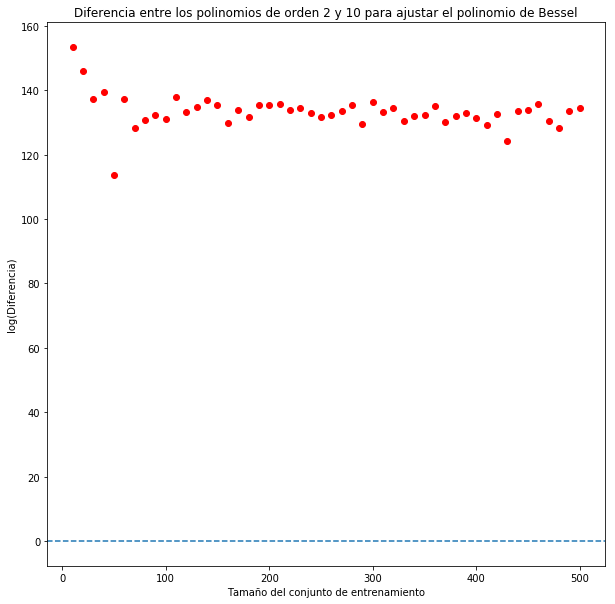

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.plot([i for i in range(10, 501, 10)], np.log(deltas), 'ro')
ax.axhline(0, linestyle = '--')

plt.title('Diferencia entre los polinomios de orden 2 y 10 para ajustar el polinomio de Bessel')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('log(Diferencia)')